# Sprint 機械学習スクラッチ クラスタリング

K-meansのクラスをスクラッチで作成していきます。NumPyなど最低限のライブラリのみを使いアルゴリズムを実装していきます。



以下に雛形を用意してあります。このScratchKMeansクラスにコードを書き加えていってください。

### 《雛形》

In [3]:
class ScratchKMeans():
    """
    K-meansのスクラッチ実装

    Parameters
    ----------
    n_clusters : int
      クラスタ数
    n_init : int
      中心点の初期値を何回変えて計算するか
    max_iter : int
      1回の計算で最大何イテレーションするか
    tol : float
      イテレーションを終了する基準となる中心点と重心の許容誤差
    verbose : bool
      学習過程を出力する場合はTrue
    """
    def __init__(self, n_clusters, n_init, max_iter, tol, verbose=False):
        # ハイパーパラメータを属性として記録
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
    def fit(self, X):
        """
        K-meansによるクラスタリングを計算
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        """
        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print()
        pass
    def predict(self, X):
        """
        入力されたデータがどのクラスタに属するかを計算
        """
        pass
        return

### 《シンプルデータセット3》

In [2]:
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)

## 【問題1】中心点の初期値を決める

入力されたデータから 
K
 個の中心点 
μ
1
 から 
μ
K
 の初期値を決めるコードを作成してください。
K
 は指定したクラスタ数です。


最もシンプルな初期値の決定方法は、データ点 
X
n
 の中からランダムに 
K
 個選ぶことです。今回はこれを実装してください。


K-meansの学習結果は中心点 
μ
 の初期値に影響を受けます。そのため、学習時には複数個の初期値で計算を行います。

In [30]:
import numpy as np
import matplotlib.pyplot as plt

def kmeans(data,k,random_state=1):
    np.random.seed(seed = random_state)
    select_index = np.random.choice(len(X),k, replace=False)
    k_center = np.array([data[i,:] for i in select_index])
    return k_center

In [31]:
# n_clusters =kmeans(X,10)
# n_clusters

## 【問題2】SSEを求める関数の作成

クラスタ内誤差平方和（SSE, Sum of Squared Errors）を計算する関数を作成してください。


K-meansはこのSSEを最小化する 
r
n
k
 と 
μ
k
 を求めることが目的となります。複数個の初期値で計算したクラスタリング結果から、どれを最終的に採用するかを決める際にこのSSEを求める関数を使用します。

$
SSE = \sum_{n=1}^N \sum_{k=1}^K r_{nk} \|X_n - \mu_k\|^2
$

n
 : データ点のインデックス
 
k
 : クラスタのインデックス


X
n
 : 
n
番目のデータ点


μ
k
 : 
k
番目の中心点


r
n
k
 : データ点
X
n
がクラスタ
k
に所属していたら1、そうでなければ0

In [27]:
def SSE(data,centers, r_nk=None):
    if r_nk == None:
        np.random.seed(seed=32)
        r0 = np.random.choice(len(centers), len(data),replace=True)
        r1 = np.zeros(len(data)*len(centers)).reshape(len(centers),len(data))

        count = 0
        for i in r0 :
            r1[i,count] = 1 
            count = count + 1
    if r_nk != None:
        r_nk1 = np.zeros(len(data)*len(centers)).reshape(len(data),len(centers))
        count = 0
        for i in r_nk :
            r_nk1[count, i ] = 1 
            count = count + 1
    
    E_dist = np.ones(len(centers)*len(data))
    E_dist = E_dist.reshape(len(centers),len(data))
    
    for i in range(len(centers)):
        E_dist[i] = np.diag(np.dot((X-centers[i]), (X-centers[i]).T))

    return sum(sum(np.dot(r1.T,E_dist)))

In [29]:
# SSE(X,n_clusters)

## 【問題3】クラスタへの割り当て

全てのデータ点 
X
n
 を最も近い中心点 
μ
k
 に割り当てるコードを作成してください。


K-menasにおける 近い とは点と点のユークリッド距離が小さくなることです。ユークリッド距離とはピタゴラスの定理（三平方の定理）で求められるものですが、ベクトル 
p
,
q
 に対しては以下の数式で表現できます。



$
\|q-p\| = \sqrt{(q-p)\cdot(q-p)}
$

NumPyにはこの関数がnp.linalg.normとして用意されているため使用してください。


numpy.linalg.norm — NumPy v1.17 Manual


中心点 
μ
k
 を固定した上でSSEを最小化していることになりますが、SSE自体を求める必要はありません。

In [34]:
from numpy import linalg

def allocate(data,centers):
    r_nk = np.ones(len(data)*len(centers))
    r_nk = r_nk.reshape(len(data),len(centers))

    for i in range(len(centers)):
        r_nk[:,i] = linalg.norm(data - centers[i], axis=1)

    r_nk = np.argmin(r_nk,axis=1)
    return r_nk

In [38]:
# r_list = allocate(X,n_clusters)
# r_list

## 【問題4】中心点の移動

中心点 
μ
k
 を 
k
 番目のクラスタに割り当てられる全てのデータ点 
X
n
 の平均値（重心）に移動するコードを作成してください

In [41]:
import pandas as pd

def move_vertex(data,r_nk):
    
    r_nk = r_nk.reshape(-1,1)
    data1 = np.concatenate([data, r_nk], 1)
    pd_data = pd.DataFrame(data1)
    data_mean = pd_data.groupby(2).mean()
    data_mean = data_mean.values
    
    return data_mean

In [43]:
# X_mean = move_vertex(X,r_list)
# X_mean

In [857]:
# 動作確認
check_list = cluster_allocate(X)
new_mu = move_center(check_list, n_clusters)
print(new_mu)

[[ 1.99645666  1.06603355]
 [-1.73940873  3.73522739]
 [-0.20992086  5.62502564]]


In [888]:
# 動作確認
check_list = cluster_allocate(X)
new_mu = move_center(check_list, n_clusters)
print(new_mu)

[[ 1.99645666  1.06603355]
 [-1.73940873  3.73522739]
 [-0.20992086  5.62502564]]


## 【問題5】繰り返し

クラスタへの割り当てと中心点の移動を繰り返すことで学習を行うコードを作成してください。


次のどれかの条件を満たしたらこれを止めます。


- 繰り返しが指定した回数に到達する。（雛形では引数max_iter）
- 中心点 
μ
k
 と重心の差の合計が指定した許容値以下になる。（雛形では引数tol）

## 【問題6】異なる初期値で計算
問題5の繰り返しを、指定した回数初期値を変更して計算するコードを作成してください。回数は雛形では引数n_initで指定します。


複数計算した中でSSEが最小になったものが最終的な学習結果となるため、その時の中心点 
μ
k
 を保持しておきます。

In [47]:
iter_num = 5   # 中心点移動回数
n_init = 5    # 初期値変更回数
k = 5

#　初期座標の決定
for j in range(n_init):
    n_clusters = kmeans(X,k,np.random.randint(1000))

    for i in range(iter_num):
        r_list = allocate(X,n_clusters) 
        n_clusters = move_vertex(X,r_list)
    
    # onehot変換
    r_nk1 = np.zeros(len(X)*len(n_clusters))
    r_nk1 = r_nk1.reshape(len(X),len(n_clusters))
    count = 0
    for i in r_list :
        r_nk1[count, i ] = 1 
        count = count + 1

    E_dist = np.ones(len(X)*len(n_clusters))
    E_dist = E_dist.reshape(len(n_clusters),len(X))
    
    for i in range(len(n_clusters)):
        E_dist[i] = np.sqrt(np.diag(np.dot((X-n_clusters[i]), (X-n_clusters[i]).T)))

    SSE_temp = sum(sum(E_dist*r_nk1.T))

## 【問題7】推定
新たなデータに対してどのクラスタに所属するかの推定の際は、学習時の1つ目のフェーズと同じことを行います。


- データ点 
X
n
 と学習で決まった中心点 
μ
k
 に対し、 
S
S
E
 を最小化する 
r
n
k
 を選ぶ。

具体的には次のことです。


- データ点 
X
n
 を最も近い 
μ
k
 に割り当てる。


In [49]:
class ScratchKMeans():
    """
    K-meansのスクラッチ実装

    Parameters
    ----------
    n_clusters : int
      クラスタ数
    n_init : int
      中心点の初期値を何回変えて計算するか
    max_iter : int
      1回の計算で最大何イテレーションするか
    tol : float
      イテレーションを終了する基準となる中心点と重心の許容誤差
    verbose : bool
      学習過程を出力する場合はTrue
    """
    def __init__(self, n_init, max_iter):
        # ハイパーパラメータを属性として記録
        self.n_init = n_init
        self.max_iter = max_iter
    
    def _base_vertex(self,data,k,random_state=1):
        np.random.seed(seed = random_state)
        select_index = np.random.choice(len(data), k, replace=False)
        k_center = np.array([data[i,:] for i in select_index])        
        return k_center
    
    def allocate(self,data,centers):
        r_nk = np.ones(len(data)*len(centers))
        r_nk = r_nk.reshape(len(data),len(centers))

        for i in range(len(centers)):
            r_nk[:,i] = linalg.norm(data - centers[i], axis=1)
        r_nk = np.argmin(r_nk,axis=1)
        return r_nk

    def move_vertex(self,data,r_nk):
        # 平均値の取得
        r_nk = r_nk.reshape(-1,1)
        data1 = np.concatenate([data, r_nk], 1)
        pd_data = pd.DataFrame(data1)
        
        # 各グループの平均値
        data_mean = pd_data.groupby(2).mean()
        data_mean = data_mean.values
        return data_mean
    
    def SSE2(self,data,centers,r_nk):

        r_nk1 = np.zeros(len(data)*len(centers))
        r_nk1 = r_nk1.reshape(len(data),len(centers))
        count = 0
        for i in r_nk :
            r_nk1[count, i ] = 1 
            count = count + 1
        
        E_dist = np.ones(len(data)*len(centers))
        E_dist = E_dist.reshape(len(centers),len(data))
        for i in range(len(centers)):
            E_dist[i] = np.sqrt(np.diag(np.dot((data-centers[i]), (data-centers[i]).T)))
    
        SSE_temp = sum(sum(E_dist*r_nk1.T))
        return SSE_temp

    def fit(self, data, c_number):

        SSE2_list = []
        for j in range(self.n_init):
            n_clusters = self._base_vertex(data,c_number,random_state = np.random.randint(1000))
            for i in range(self.max_iter):
                r_list = self.allocate(data, n_clusters) 
                n_clusters = self.move_vertex(data,r_list)
            SSE2_list.append(self.SSE2(data, n_clusters, r_list))
            
        # 最小SSEの記録
        self.SSE = np.min(SSE2_list)
               
        for j in range(self.n_init):
            n_clusters = self._base_vertex(data,c_number,np.random.randint(1000))
            for i in range(self.max_iter):
                r_list = self.allocate(data, n_clusters) 
                n_clusters = self.move_vertex(data, r_list)
            if self.SSE2(data, n_clusters, r_list) == self.SSE:
                self.min_n_clusters = n_clusters
                break
        
    def predict(self, data):
        """
        入力されたデータがどのクラスタに属するかを計算
        """
        p_dist = np.ones(len(data)*len(self.min_n_clusters))
        p_dist = p_dist.reshape(len(self.min_n_clusters),len(data)) 
        for i in range(len(self.min_n_clusters)):
            p_dist[i] = np.diag(np.dot((data - self.min_n_clusters[i]), (data - self.min_n_clusters[i]).T))
        p_dist = np.argmin(p_dist,axis=0)
        return p_dist

In [71]:
kmeans = ScratchKMeans(10,10)
kmeans.fit(X,4)
pred = kmeans.predict(X)
print(pred)
print("SSE : ", kmeans.SSE)

[0 3 0 0 0 0 1 3 0 3 3 3 3 3 3 2 2 1 1 2 0 3 1 2 0 1 1 0 2 2 2 3 2 2 1 0 3
 2 3 1 0 1 3 1 1 3 2 1 0 0 0 2 1 1 1 3 3 2 2 3 3 2 2 0 2 3 1 1 2 0 3 2 0 3
 0 0 1 1 2 2 2 3 1 0 2 1 2 2 0 0 0 1 0 1 1 3 3 1 3 0]
SSE :  62.63796180120853


## 【問題8】エルボー法の実装
K-meansにおいて中心点の個数 
k
 は人為的に決める必要がありますが、その判断方法としてエルボー法があります。エルボー法により中心点の個数 
k
 を検討するためのコードを作成してください。


SSEを縦軸、クラスタ数 
k
 を横軸にした折れ線グラフを表示します。このためにK-meansのインスタンスからはSSEを取得できるようにしてください。

In [72]:
def elbow(data,c_number_max):
    SSE_list = np.zeros(c_number_max)
    for i in range(1,c_number_max):
        kmeans.fit(data,i)
        SSE_list[i] = kmeans.SSE
    return SSE_list

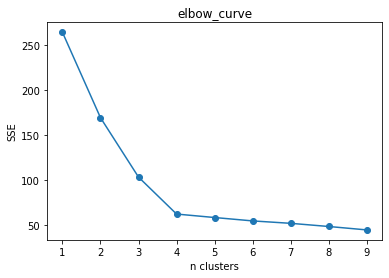

In [73]:
SSE_list = elbow(X,10)
plt.plot(range(1,10),SSE_list[1:10])
plt.scatter(range(1,10),SSE_list[1:10])
plt.xlabel("n clusters")
plt.ylabel("SSE")
plt.title('elbow_curve')
plt.show()